<a href="https://colab.research.google.com/github/subod4/Simulation-and-Modeling-Projects/blob/main/flightsimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install simpy

Flight 1 arrived at 0.00 minutes
Flight 1 started service after waiting 0.00 minutes
Flight 1 finished service at 5.25 minutes
Flight 2 arrived at 10.20 minutes
Flight 2 started service after waiting 0.00 minutes
Flight 3 arrived at 13.42 minutes
Flight 3 started service after waiting 0.00 minutes
Flight 2 finished service at 17.43 minutes
Flight 3 finished service at 25.18 minutes
Flight 4 arrived at 26.75 minutes
Flight 4 started service after waiting 0.00 minutes
Flight 4 finished service at 32.62 minutes
Flight 5 arrived at 49.03 minutes
Flight 5 started service after waiting 0.00 minutes
Flight 5 finished service at 54.32 minutes
Flight 6 arrived at 54.51 minutes
Flight 6 started service after waiting 0.00 minutes
Flight 7 arrived at 56.97 minutes
Flight 7 started service after waiting 0.00 minutes
Flight 8 arrived at 57.24 minutes
Flight 7 finished service at 63.96 minutes
Flight 8 started service after waiting 6.72 minutes
Flight 6 finished service at 64.56 minutes
Flight 9 arri

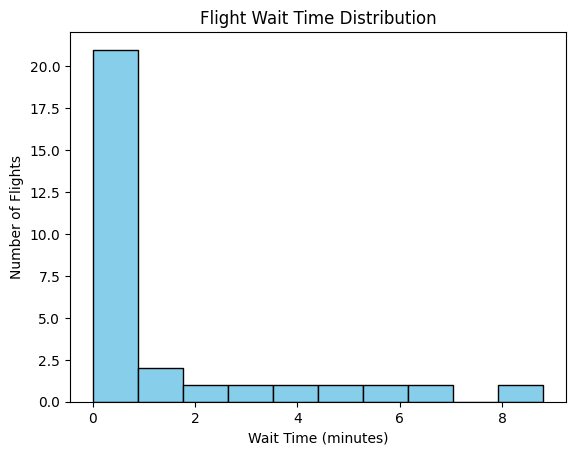

In [3]:
import simpy
import random
import matplotlib.pyplot as plt

# Parameters
RANDOM_SEED = 42
NUM_FLIGHTS = 30
INTERARRIVAL_TIME = 10  # Average time between flight arrivals (minutes)
SERVICE_TIME = [5, 15]  # Min and max time for ground handling

random.seed(RANDOM_SEED)

# Data collection
arrival_times = []
wait_times = []


def flight_process(env, name, ground_handling):
    """Simulate the flight's lifecycle."""
    arrival_time = env.now
    arrival_times.append(arrival_time)
    print(f"{name} arrived at {arrival_time:.2f} minutes")

    with ground_handling.request() as request:
        yield request
        wait = env.now - arrival_time
        wait_times.append(wait)
        print(f"{name} started service after waiting {wait:.2f} minutes")

        service_duration = random.uniform(*SERVICE_TIME)
        yield env.timeout(service_duration)
        print(f"{name} finished service at {env.now:.2f} minutes")


def flight_generator(env, ground_handling):
    """Generate flights at regular intervals."""
    for i in range(NUM_FLIGHTS):
        env.process(flight_process(env, f"Flight {i+1}", ground_handling))
        yield env.timeout(random.expovariate(1.0 / INTERARRIVAL_TIME))


# Run the simulation
env = simpy.Environment()
ground_handling = simpy.Resource(env, capacity=2)  # 2 ground handling teams
env.process(flight_generator(env, ground_handling))
env.run()

# Plot the wait time distribution
plt.hist(wait_times, bins=10, color='skyblue', edgecolor='black')
plt.title("Flight Wait Time Distribution")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Number of Flights")
plt.show()
